In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load Necessary libraries

In [2]:
from __future__ import print_function
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
from torchsummary import summary

In [3]:
import warnings
warnings.simplefilter("ignore")
warnings.warn("deprecated", DeprecationWarning)
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

In [ ]:
# import albumentations as A
# import cv2

In [ ]:
# from albumentations.pytorch import ToTensorV2
# from PIL import Image
# import matplotlib.pyplot as plt

In [4]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


Load all the modules

In [5]:
!cp /content/drive/MyDrive/The\ School\ of\ AI/Session\ 9\ Assignment/dataload.py /content
#!cp /content/drive/MyDrive/The\ School\ of\ AI/Session\ 9\ Assignment/model.py /content
!cp /content/drive/MyDrive/The\ School\ of\ AI/Session\ 9\ Assignment/model_v1.py /content
!cp /content/drive/MyDrive/The\ School\ of\ AI/Session\ 9\ Assignment/run.py /content
!cp /content/drive/MyDrive/The\ School\ of\ AI/Session\ 9\ Assignment/utils.py /content

In [6]:
import dataload
import model_v1
import run
import utils

from dataload import Draw, AlbumentationImageDataset, args, loader
from model_v1 import NetArch, return_summary
from run import Performance, scores
from utils import allot_device, Plots, plot_metrics

In [7]:
train_loader,test_loader = loader.load_data(128)
print(len(train_loader),len(test_loader))

Files already downloaded and verified
Files already downloaded and verified
391 79


<Figure size 640x480 with 0 Axes>

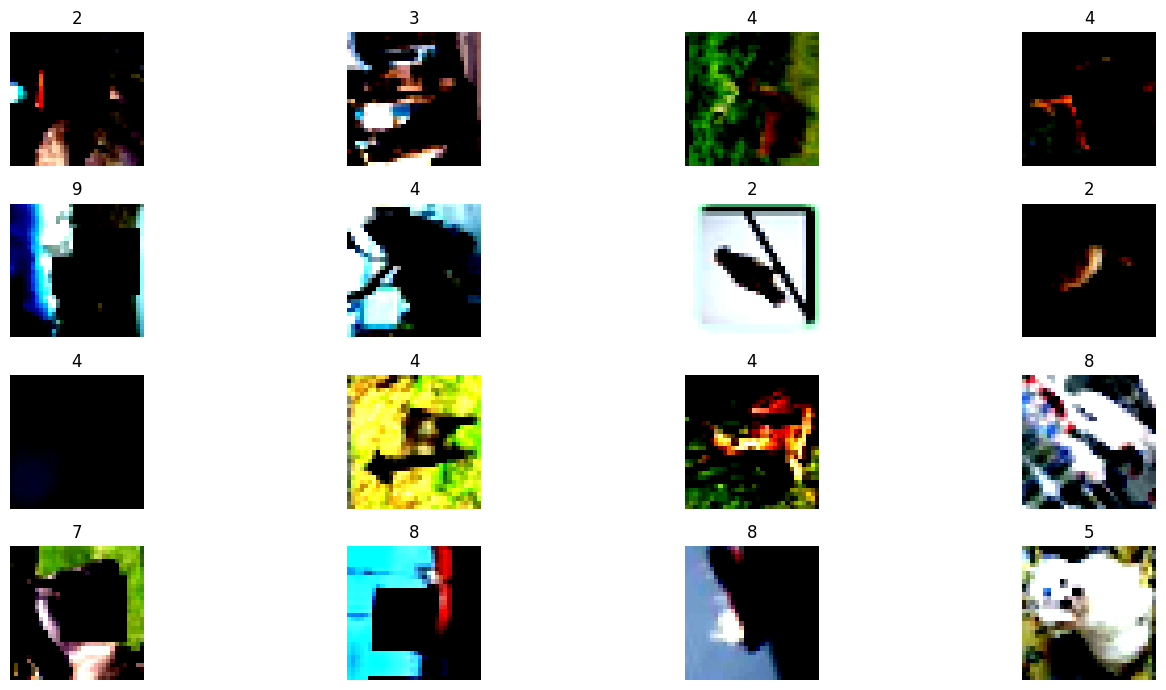

In [8]:
#train_data
Plots(None,17,train_loader).plot_images()

<Figure size 640x480 with 0 Axes>

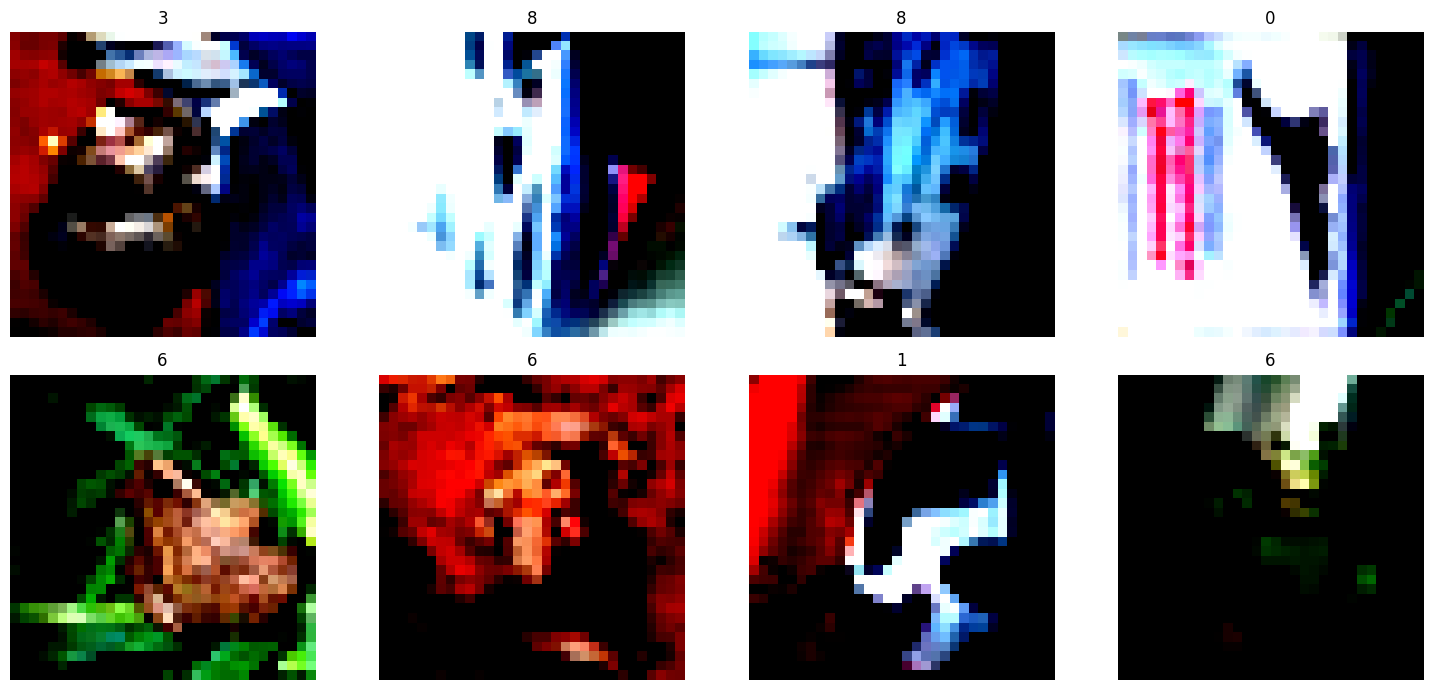

In [9]:
#test_data
Plots(None,9,test_loader).plot_images()

In [10]:
 # Setting up the device
device = allot_device(142)
print(f"{device} is available")

cuda is available


In [11]:
model = NetArch().to(device)

return_summary(model,device,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]             288
            Conv2d-6          [-1, 128, 32, 32]           4,096
              ReLU-7          [-1, 128, 32, 32]               0
       BatchNorm2d-8          [-1, 128, 32, 32]             256
           Dropout-9          [-1, 128, 32, 32]               0
           Conv2d-10           [-1, 64, 16, 16]          73,728
           Conv2d-11           [-1, 64, 16, 16]             576
           Conv2d-12          [-1, 128, 16, 16]           8,192
             ReLU-13          [-1, 128, 16, 16]               0
      BatchNorm2d-14          [-1, 128,

In [12]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=18, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 50
perf = Performance(device,model,(train_loader,test_loader),optimizer,criterion,[False,0.01])

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  perf.train()
  perf.test()

Epoch 1


Train: Loss=1.6010 Batch_id=390 Accuracy=35.21: 100%|██████████| 391/391 [00:23<00:00, 16.80it/s]


Test set: Average loss: 0.0111, Accuracy: 4835/10000 (48.35%)

Epoch 2


Train: Loss=1.4659 Batch_id=390 Accuracy=46.38: 100%|██████████| 391/391 [00:22<00:00, 17.62it/s]


Test set: Average loss: 0.0096, Accuracy: 5568/10000 (55.68%)

Epoch 3


Train: Loss=1.1664 Batch_id=390 Accuracy=51.10: 100%|██████████| 391/391 [00:21<00:00, 18.33it/s]


Test set: Average loss: 0.0086, Accuracy: 6125/10000 (61.25%)

Epoch 4


Train: Loss=1.1982 Batch_id=390 Accuracy=54.63: 100%|██████████| 391/391 [00:21<00:00, 18.39it/s]


Test set: Average loss: 0.0077, Accuracy: 6499/10000 (64.99%)

Epoch 5


Train: Loss=1.1860 Batch_id=390 Accuracy=57.44: 100%|██████████| 391/391 [00:22<00:00, 17.77it/s]


Test set: Average loss: 0.0072, Accuracy: 6816/10000 (68.16%)

Epoch 6


Train: Loss=1.0246 Batch_id=390 Accuracy=59.48: 100%|██████████| 391/391 [00:22<00:00, 17.21it/s]


Test set: Average loss: 0.0067, Accuracy: 7045/10000 (70.45%)

Epoch 7


Train: Loss=1.1671 Batch_id=390 Accuracy=60.84: 100%|██████████| 391/391 [00:22<00:00, 17.59it/s]


Test set: Average loss: 0.0063, Accuracy: 7167/10000 (71.67%)

Epoch 8


Train: Loss=1.2417 Batch_id=390 Accuracy=62.49: 100%|██████████| 391/391 [00:21<00:00, 18.17it/s]


Test set: Average loss: 0.0062, Accuracy: 7169/10000 (71.69%)

Epoch 9


Train: Loss=0.8274 Batch_id=390 Accuracy=63.45: 100%|██████████| 391/391 [00:21<00:00, 18.45it/s]


Test set: Average loss: 0.0059, Accuracy: 7390/10000 (73.90%)

Epoch 10


Train: Loss=0.9357 Batch_id=390 Accuracy=64.12: 100%|██████████| 391/391 [00:21<00:00, 17.80it/s]


Test set: Average loss: 0.0056, Accuracy: 7560/10000 (75.60%)

Epoch 11


Train: Loss=0.7300 Batch_id=390 Accuracy=65.61: 100%|██████████| 391/391 [00:22<00:00, 17.42it/s]


Test set: Average loss: 0.0056, Accuracy: 7553/10000 (75.53%)

Epoch 12


Train: Loss=1.0232 Batch_id=390 Accuracy=66.05: 100%|██████████| 391/391 [00:21<00:00, 18.13it/s]


Test set: Average loss: 0.0052, Accuracy: 7708/10000 (77.08%)

Epoch 13


Train: Loss=0.9679 Batch_id=390 Accuracy=66.85: 100%|██████████| 391/391 [00:21<00:00, 18.23it/s]


Test set: Average loss: 0.0055, Accuracy: 7560/10000 (75.60%)

Epoch 14


Train: Loss=1.0806 Batch_id=390 Accuracy=67.33: 100%|██████████| 391/391 [00:21<00:00, 18.18it/s]


Test set: Average loss: 0.0051, Accuracy: 7776/10000 (77.76%)

Epoch 15


Train: Loss=0.7252 Batch_id=390 Accuracy=67.84: 100%|██████████| 391/391 [00:22<00:00, 17.62it/s]


Test set: Average loss: 0.0051, Accuracy: 7763/10000 (77.63%)

Epoch 16


Train: Loss=0.8300 Batch_id=390 Accuracy=68.47: 100%|██████████| 391/391 [00:22<00:00, 17.54it/s]


Test set: Average loss: 0.0048, Accuracy: 7896/10000 (78.96%)

Epoch 17


Train: Loss=0.8534 Batch_id=390 Accuracy=69.09: 100%|██████████| 391/391 [00:21<00:00, 18.42it/s]


Test set: Average loss: 0.0049, Accuracy: 7878/10000 (78.78%)

Epoch 18


Train: Loss=1.0377 Batch_id=390 Accuracy=69.33: 100%|██████████| 391/391 [00:21<00:00, 18.00it/s]


Test set: Average loss: 0.0047, Accuracy: 7939/10000 (79.39%)

Epoch 19


Train: Loss=0.6909 Batch_id=390 Accuracy=69.81: 100%|██████████| 391/391 [00:22<00:00, 17.46it/s]


Test set: Average loss: 0.0046, Accuracy: 8018/10000 (80.18%)

Epoch 20


Train: Loss=0.8231 Batch_id=390 Accuracy=70.29: 100%|██████████| 391/391 [00:22<00:00, 17.16it/s]


Test set: Average loss: 0.0045, Accuracy: 8056/10000 (80.56%)

Epoch 21


Train: Loss=0.8401 Batch_id=390 Accuracy=70.51: 100%|██████████| 391/391 [00:22<00:00, 17.53it/s]


Test set: Average loss: 0.0046, Accuracy: 7999/10000 (79.99%)

Epoch 22


Train: Loss=0.7752 Batch_id=390 Accuracy=70.90: 100%|██████████| 391/391 [00:21<00:00, 18.00it/s]


Test set: Average loss: 0.0043, Accuracy: 8084/10000 (80.84%)

Epoch 23


Train: Loss=0.8101 Batch_id=390 Accuracy=71.31: 100%|██████████| 391/391 [00:21<00:00, 18.29it/s]


Test set: Average loss: 0.0043, Accuracy: 8120/10000 (81.20%)

Epoch 24


Train: Loss=0.7386 Batch_id=390 Accuracy=71.62: 100%|██████████| 391/391 [00:21<00:00, 18.01it/s]


Test set: Average loss: 0.0042, Accuracy: 8152/10000 (81.52%)

Epoch 25


Train: Loss=0.9389 Batch_id=390 Accuracy=71.79: 100%|██████████| 391/391 [00:21<00:00, 17.80it/s]


Test set: Average loss: 0.0043, Accuracy: 8144/10000 (81.44%)

Epoch 26


Train: Loss=1.0211 Batch_id=390 Accuracy=72.37: 100%|██████████| 391/391 [00:22<00:00, 17.20it/s]


Test set: Average loss: 0.0043, Accuracy: 8143/10000 (81.43%)

Epoch 27


Train: Loss=0.5990 Batch_id=390 Accuracy=72.42: 100%|██████████| 391/391 [00:22<00:00, 17.70it/s]


Test set: Average loss: 0.0041, Accuracy: 8181/10000 (81.81%)

Epoch 28


Train: Loss=0.6881 Batch_id=390 Accuracy=72.62: 100%|██████████| 391/391 [00:21<00:00, 18.50it/s]


Test set: Average loss: 0.0040, Accuracy: 8279/10000 (82.79%)

Epoch 29


Train: Loss=0.7863 Batch_id=390 Accuracy=72.65: 100%|██████████| 391/391 [00:21<00:00, 18.03it/s]


Test set: Average loss: 0.0040, Accuracy: 8265/10000 (82.65%)

Epoch 30


Train: Loss=0.7737 Batch_id=390 Accuracy=73.24: 100%|██████████| 391/391 [00:22<00:00, 17.34it/s]


Test set: Average loss: 0.0040, Accuracy: 8257/10000 (82.57%)

Epoch 31


Train: Loss=0.8024 Batch_id=390 Accuracy=73.46: 100%|██████████| 391/391 [00:21<00:00, 18.34it/s]


Test set: Average loss: 0.0039, Accuracy: 8298/10000 (82.98%)

Epoch 32


Train: Loss=0.8553 Batch_id=390 Accuracy=73.23: 100%|██████████| 391/391 [00:20<00:00, 18.78it/s]


Test set: Average loss: 0.0040, Accuracy: 8309/10000 (83.09%)

Epoch 33


Train: Loss=0.9436 Batch_id=390 Accuracy=73.72: 100%|██████████| 391/391 [00:20<00:00, 19.25it/s]


Test set: Average loss: 0.0039, Accuracy: 8307/10000 (83.07%)

Epoch 34


Train: Loss=0.6257 Batch_id=390 Accuracy=73.93: 100%|██████████| 391/391 [00:20<00:00, 18.79it/s]


Test set: Average loss: 0.0039, Accuracy: 8352/10000 (83.52%)

Epoch 35


Train: Loss=0.8159 Batch_id=390 Accuracy=73.86: 100%|██████████| 391/391 [00:21<00:00, 18.23it/s]


Test set: Average loss: 0.0038, Accuracy: 8321/10000 (83.21%)

Epoch 36


Train: Loss=0.7434 Batch_id=390 Accuracy=74.07: 100%|██████████| 391/391 [00:22<00:00, 17.26it/s]


Test set: Average loss: 0.0038, Accuracy: 8362/10000 (83.62%)

Epoch 37


Train: Loss=0.7450 Batch_id=390 Accuracy=74.51: 100%|██████████| 391/391 [00:23<00:00, 16.33it/s]


Test set: Average loss: 0.0037, Accuracy: 8377/10000 (83.77%)

Epoch 38


Train: Loss=0.8454 Batch_id=390 Accuracy=74.68: 100%|██████████| 391/391 [00:23<00:00, 16.94it/s]


Test set: Average loss: 0.0037, Accuracy: 8389/10000 (83.89%)

Epoch 39


Train: Loss=0.6321 Batch_id=390 Accuracy=74.83: 100%|██████████| 391/391 [00:22<00:00, 17.42it/s]


Test set: Average loss: 0.0037, Accuracy: 8368/10000 (83.68%)

Epoch 40


Train: Loss=0.7847 Batch_id=390 Accuracy=74.96: 100%|██████████| 391/391 [00:22<00:00, 17.57it/s]


Test set: Average loss: 0.0037, Accuracy: 8403/10000 (84.03%)

Epoch 41


Train: Loss=0.7752 Batch_id=390 Accuracy=74.90: 100%|██████████| 391/391 [00:22<00:00, 17.26it/s]


Test set: Average loss: 0.0037, Accuracy: 8400/10000 (84.00%)

Epoch 42


Train: Loss=0.8555 Batch_id=390 Accuracy=75.64: 100%|██████████| 391/391 [00:23<00:00, 16.97it/s]


Test set: Average loss: 0.0036, Accuracy: 8434/10000 (84.34%)

Epoch 43


Train: Loss=0.6384 Batch_id=390 Accuracy=75.31: 100%|██████████| 391/391 [00:23<00:00, 16.80it/s]


Test set: Average loss: 0.0036, Accuracy: 8441/10000 (84.41%)

Epoch 44


Train: Loss=0.9789 Batch_id=390 Accuracy=75.63: 100%|██████████| 391/391 [00:23<00:00, 16.79it/s]


Test set: Average loss: 0.0036, Accuracy: 8459/10000 (84.59%)

Epoch 45


Train: Loss=0.5937 Batch_id=390 Accuracy=75.57: 100%|██████████| 391/391 [00:22<00:00, 17.76it/s]


Test set: Average loss: 0.0037, Accuracy: 8433/10000 (84.33%)

Epoch 46


Train: Loss=0.9469 Batch_id=390 Accuracy=75.61: 100%|██████████| 391/391 [00:21<00:00, 18.14it/s]


Test set: Average loss: 0.0037, Accuracy: 8417/10000 (84.17%)

Epoch 47


Train: Loss=0.6171 Batch_id=390 Accuracy=76.12: 100%|██████████| 391/391 [00:21<00:00, 18.24it/s]


Test set: Average loss: 0.0036, Accuracy: 8448/10000 (84.48%)

Epoch 48


Train: Loss=0.6766 Batch_id=390 Accuracy=76.09: 100%|██████████| 391/391 [00:21<00:00, 18.16it/s]


Test set: Average loss: 0.0035, Accuracy: 8478/10000 (84.78%)

Epoch 49


Train: Loss=0.8333 Batch_id=390 Accuracy=76.07: 100%|██████████| 391/391 [00:21<00:00, 18.12it/s]


Test set: Average loss: 0.0035, Accuracy: 8506/10000 (85.06%)

Epoch 50


Train: Loss=0.7595 Batch_id=390 Accuracy=76.34: 100%|██████████| 391/391 [00:22<00:00, 17.74it/s]


Test set: Average loss: 0.0034, Accuracy: 8526/10000 (85.26%)



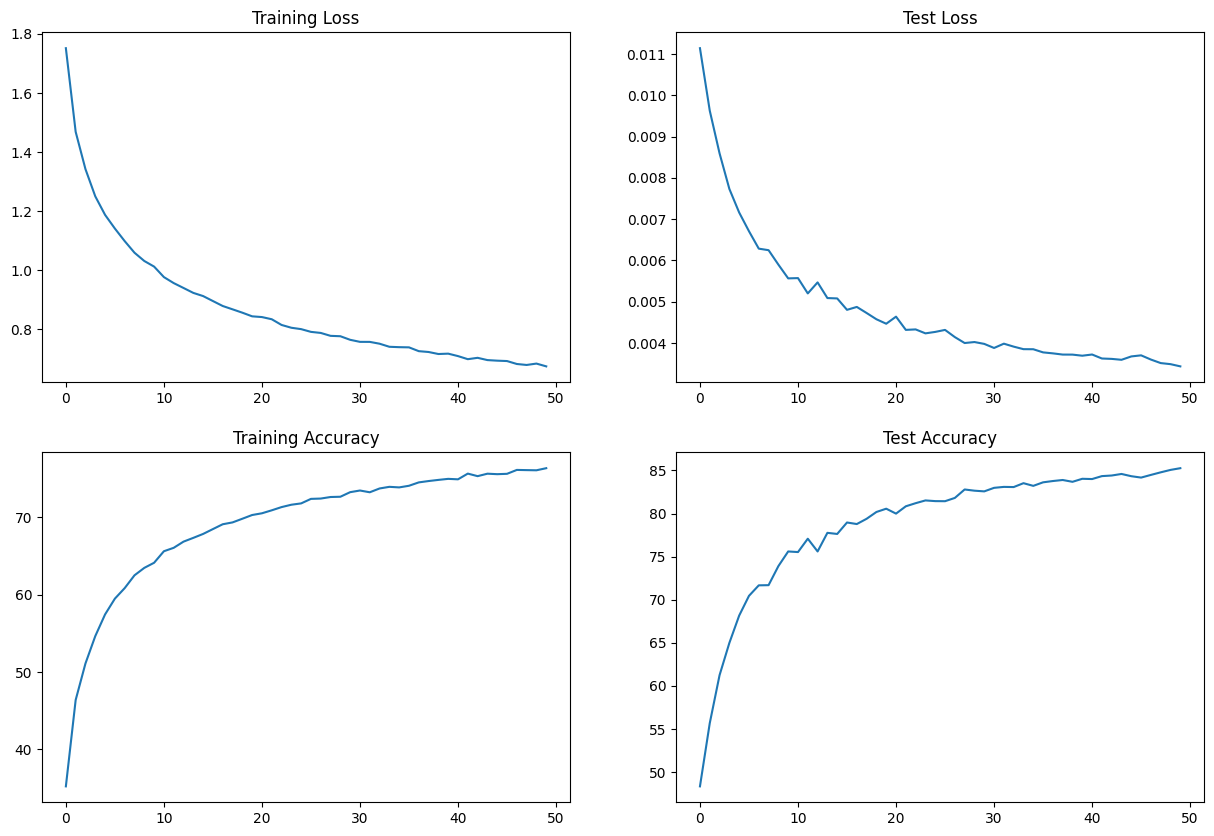

In [13]:
metrics = scores()
plot_metrics(metrics)

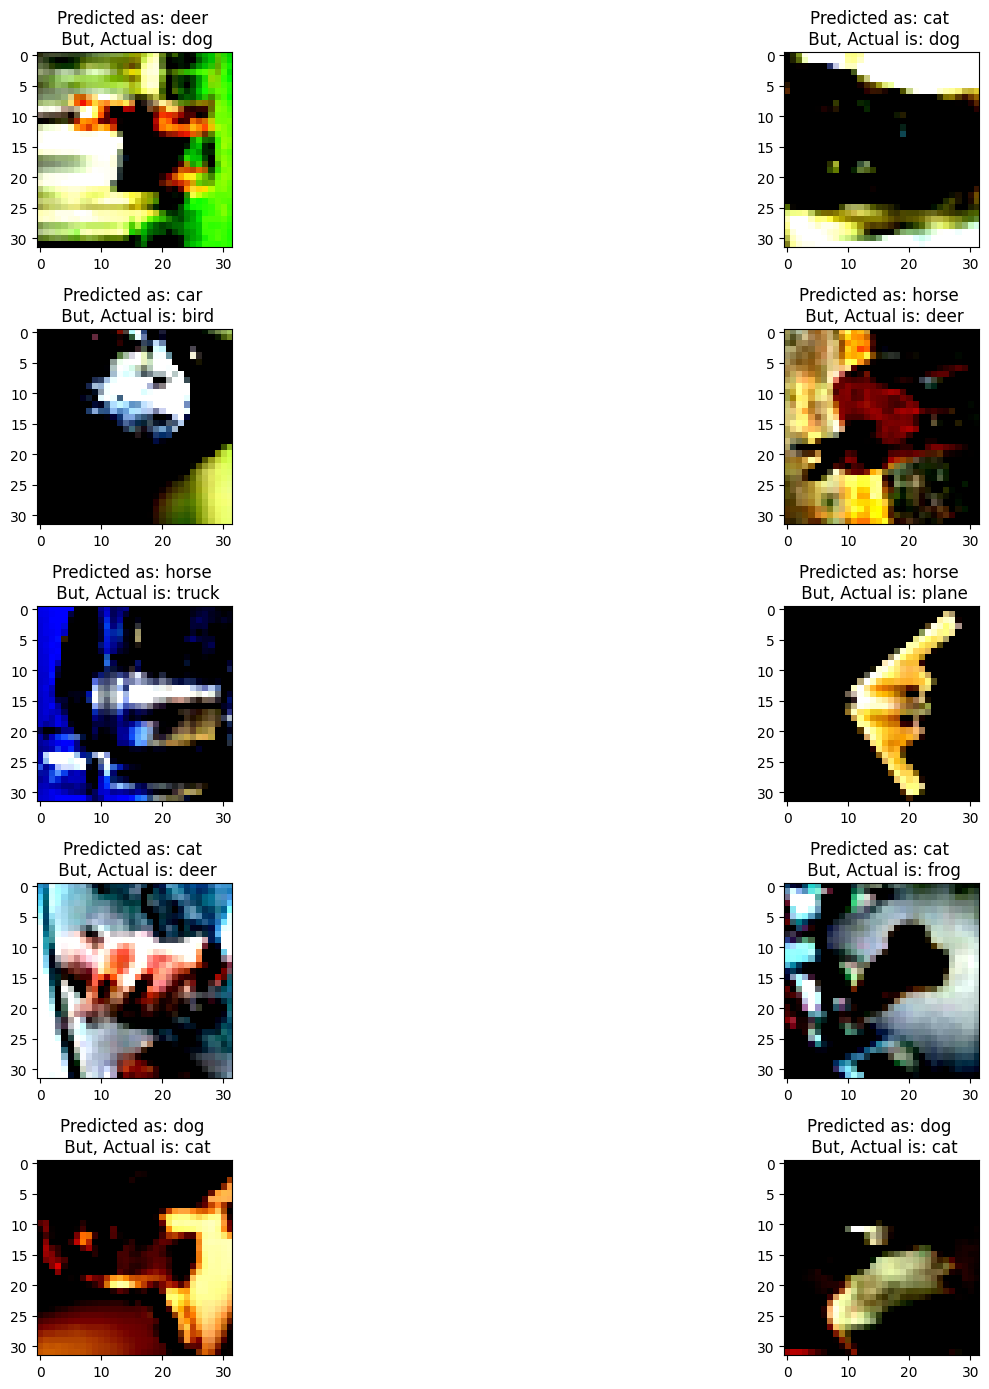

In [14]:
Plots((model,test_loader,device,10)).mis_classified()